#Star Wars Character Exploration

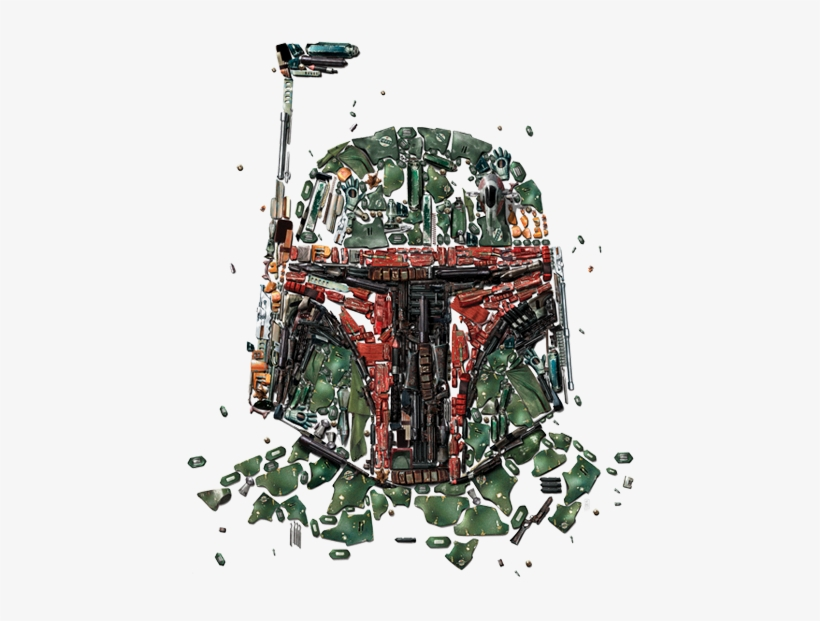

In [48]:
#pip install missingno

In [98]:
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import missingno as msno
import warnings

# Remove warnings
warnings.filterwarnings("ignore")

In [99]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
# Change the path to your own path
path = "/content/drive/My Drive/Colab Notebooks/Practice/Datasets/Star Wars/"

In [148]:
# Load the file - add the file's name
characters = pd.read_csv(path+"Star_Warss_Characters.csv")

## Character information
Lets get some information about the columns, missing values and their types.

In [149]:
characters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        87 non-null     object 
 1   height      81 non-null     float64
 2   mass        59 non-null     object 
 3   hair_color  81 non-null     object 
 4   skin_color  85 non-null     object 
 5   eye_color   84 non-null     object 
 6   birth_year  43 non-null     object 
 7   gender      84 non-null     object 
 8   homeworld   77 non-null     object 
 9   species     82 non-null     object 
dtypes: float64(1), object(9)
memory usage: 6.9+ KB


## Dealing with NaN values
Lets see how many not a number values does the dataset have. <br>
**Challenge**: Only use the Characters dataset to deal with NaN values. 
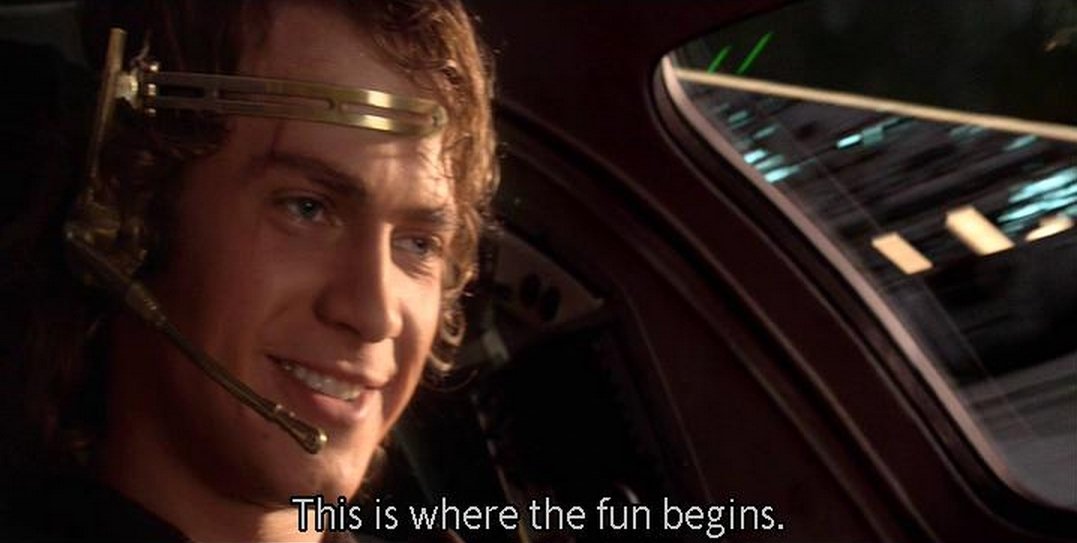


### Missing data exploration
Lets go over a barplot, heatmap, matrix and dendogram if the missing data and see if there is any relation between the missing data. 

In [150]:
# Lets explroe the NaN values
print(characters.isna().sum())

name           0
height         6
mass          28
hair_color     6
skin_color     2
eye_color      3
birth_year    44
gender         3
homeworld     10
species        5
dtype: int64


#### Barplot
Lets visually represent how many values are missing for all columns.

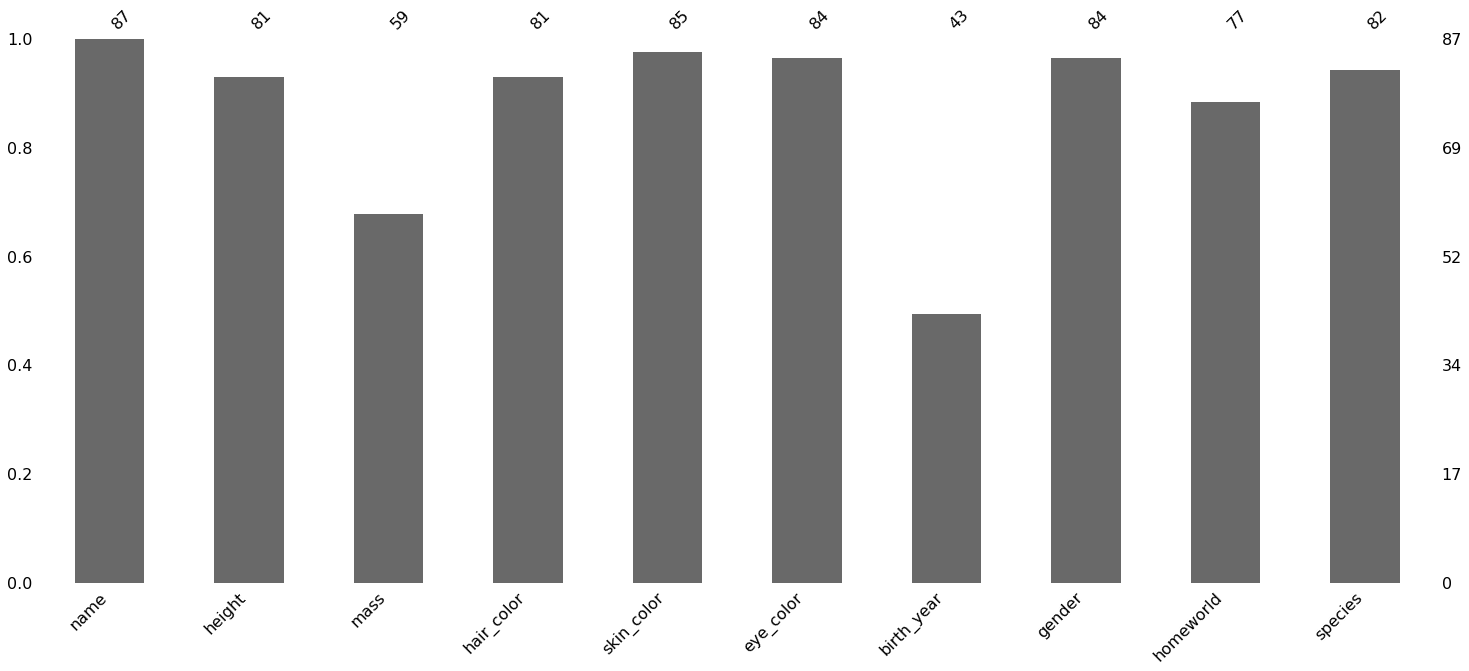

In [151]:
msno.bar(characters)

#### Matrix
Lets see where the missing data is distributed.

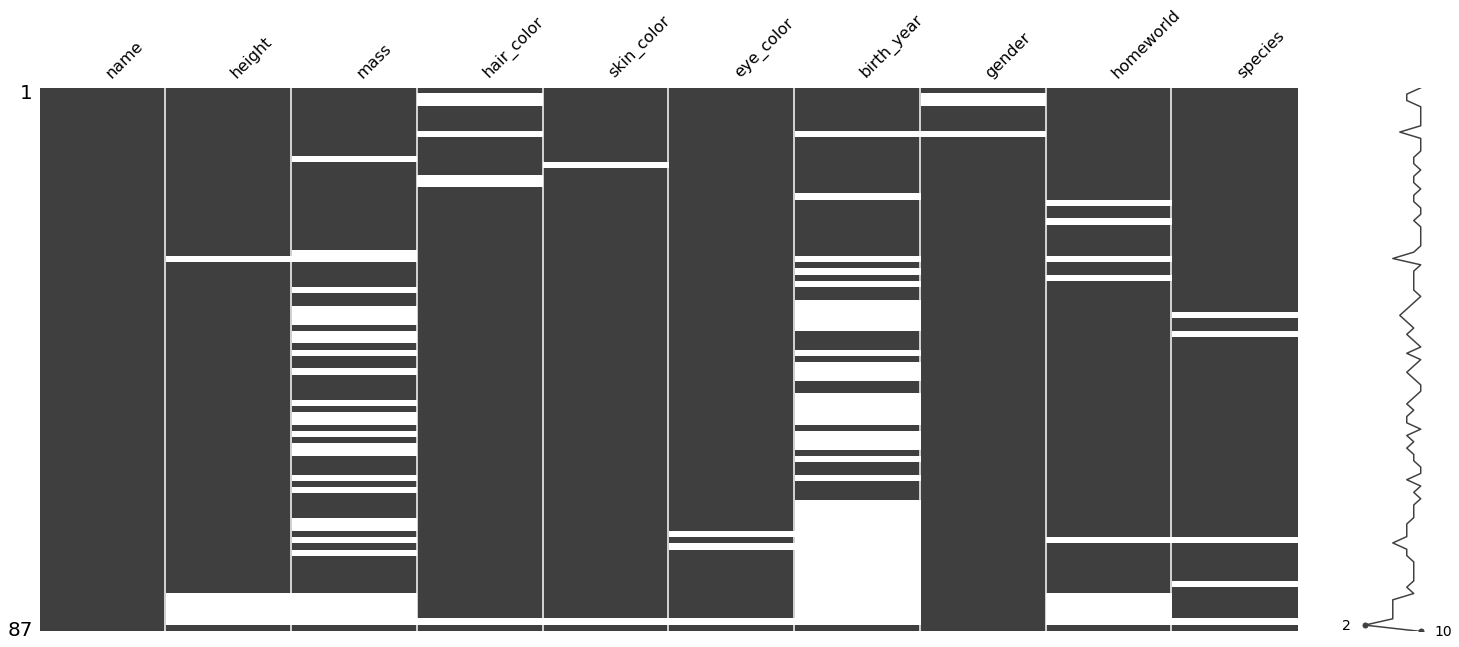

In [152]:
msno.matrix(characters)

#### Heatmap
Lets see if there are any relationships between different columns.

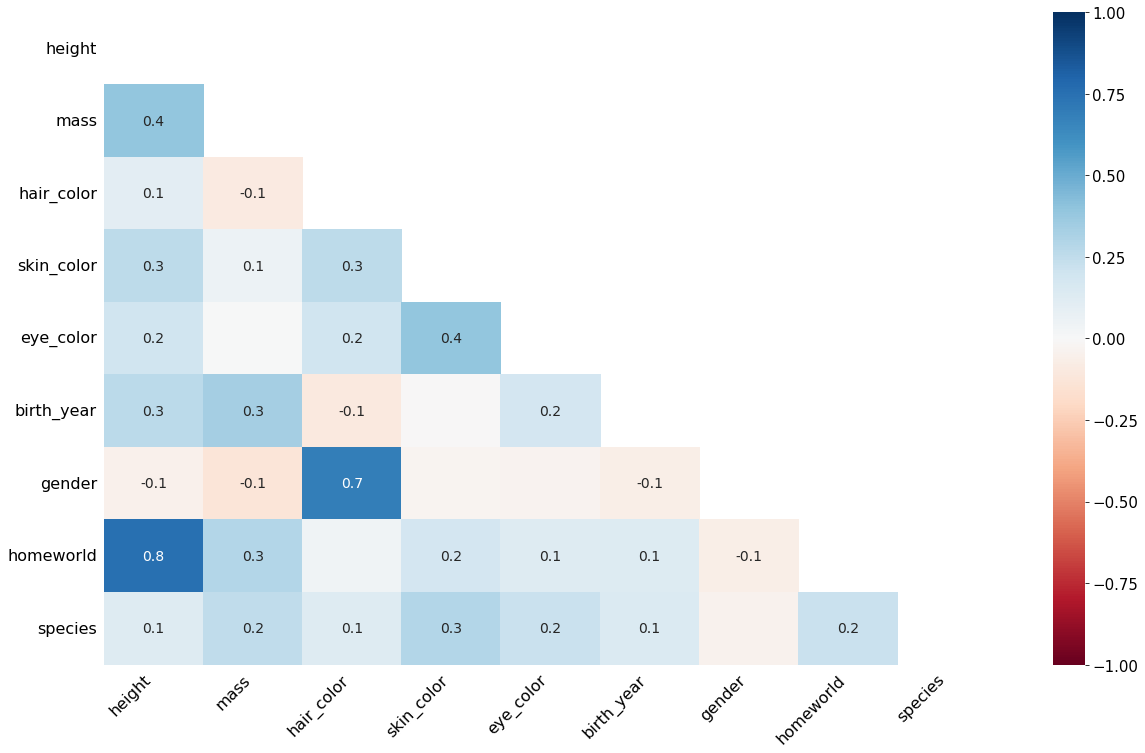

In [153]:
msno.heatmap(characters)

#### Dendogram
Lets see how the missing data is related

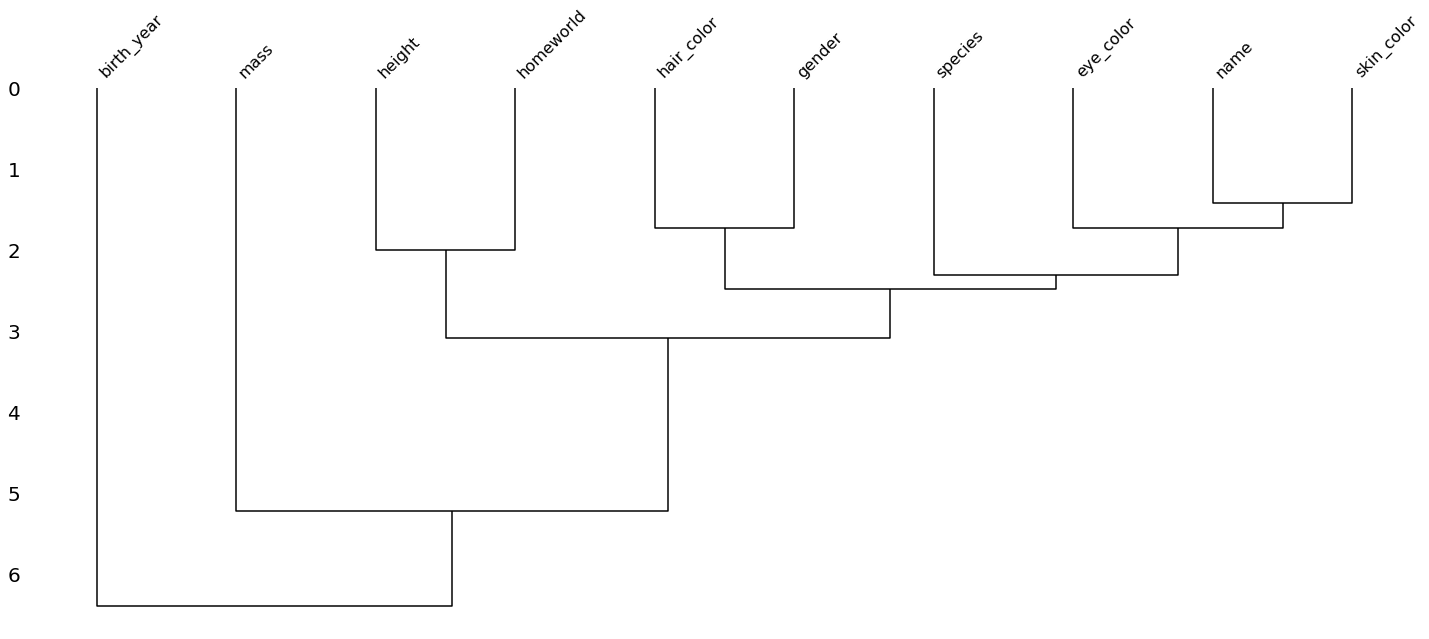

In [154]:
msno.dendrogram(characters)

### Handling missing data
After inspecting the misssing data, lets handle the missing values.

####Height
Different species and genders have different heights. We will have to dig deeper.

In [155]:
no_height = characters.loc[characters['height'].isnull()]
no_height

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
27,Arvel Crynyd,NaN,NaN,brown,fair,brown,NaN,male,NaN,Human
81,Finn,NaN,NaN,black,dark,dark,NaN,male,NaN,Human
82,Rey,NaN,NaN,brown,light,hazel,NaN,female,NaN,Human
83,Poe Dameron,NaN,NaN,brown,light,brown,NaN,male,NaN,Human
84,BB8,NaN,NaN,none,none,black,NaN,none,NaN,Droid
85,Captain Phasma,NaN,NaN,NaN,NaN,NaN,NaN,female,NaN,NaN


#####Droids
The only droid that has a missing height is BB-8. We could use the mean value of the droids to inser BB-8's height but that will make the droid too tall. However the droid is very small and we will.

In [156]:
# Droids with missing height
no_height.loc[no_height["species"] == "Droid"]

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
84,BB8,NaN,NaN,none,none,black,NaN,none,NaN,Droid


In [157]:
# All of the droids
characters.loc[characters["species"] == "Droid"]

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
1,C-3PO,167.0,75,NaN,gold,yellow,112BBY,NaN,Tatooine,Droid
2,R2-D2,96.0,32,NaN,"white, blue",red,33BBY,NaN,Naboo,Droid
7,R5-D4,97.0,32,NaN,"white, red",red,NaN,NaN,Tatooine,Droid
21,IG-88,200.0,140,none,metal,red,15BBY,none,NaN,Droid
84,BB8,NaN,NaN,none,none,black,NaN,none,NaN,Droid


In [158]:
# The mean value of the height of all droids
# This will make BB-8 at least two times taller than he actually is
print("Mean value for droid height: ", characters.loc[characters["species"] == "Droid", "height"].mean())

Mean value for droid height:  140.0


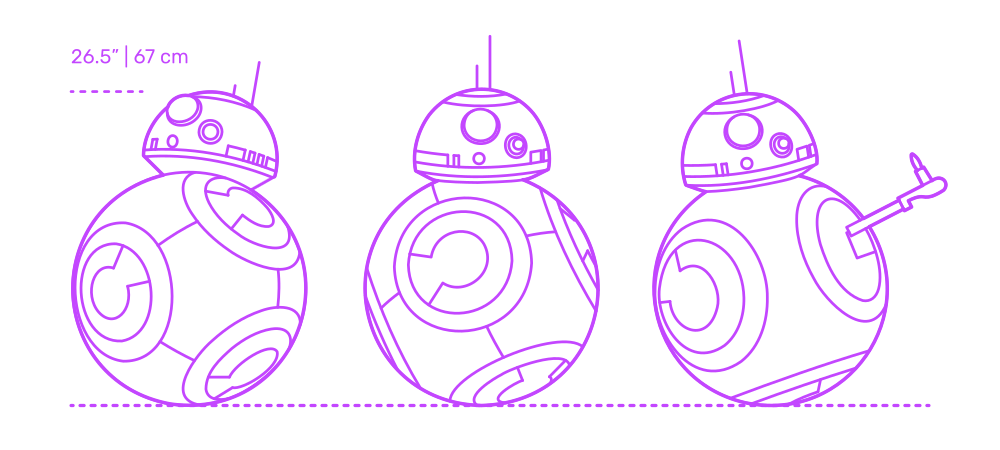

In [159]:
# Set BB-8's height 
no_height.loc[no_height["species"] == "Droid", "height"] = 67

# See if BB-8's height is updated
no_height

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
27,Arvel Crynyd,NaN,NaN,brown,fair,brown,NaN,male,NaN,Human
81,Finn,NaN,NaN,black,dark,dark,NaN,male,NaN,Human
82,Rey,NaN,NaN,brown,light,hazel,NaN,female,NaN,Human
83,Poe Dameron,NaN,NaN,brown,light,brown,NaN,male,NaN,Human
84,BB8,67.0,NaN,none,none,black,NaN,none,NaN,Droid
85,Captain Phasma,NaN,NaN,NaN,NaN,NaN,NaN,female,NaN,NaN


#####Humans
Humans will be a little bit more tricky. We can get an average height based on the character's gender and skin color. 

In [160]:
mean_height = characters[(characters["skin_color"] == "dark") & (characters["gender"] == "male") & (characters["height"].notnull())]
mean_height

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
23,Lando Calrissian,177.0,79,black,dark,brown,31BBY,male,Socorro,Human
39,Quarsh Panaka,183.0,NaN,black,dark,brown,62BBY,male,Naboo,NaN
47,Mace Windu,188.0,84,none,dark,brown,72BBY,male,Haruun Kal,Human
56,Gregar Typho,185.0,85,black,dark,brown,NaN,male,Naboo,Human


In [161]:
no_height.loc[(no_height["species"] == "Human") & (characters["skin_color"] == "dark") & (characters["gender"] == "male"), 'height'] = round(mean_height["height"].mean())
no_height 

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
27,Arvel Crynyd,NaN,NaN,brown,fair,brown,NaN,male,NaN,Human
81,Finn,183.0,NaN,black,dark,dark,NaN,male,NaN,Human
82,Rey,NaN,NaN,brown,light,hazel,NaN,female,NaN,Human
83,Poe Dameron,NaN,NaN,brown,light,brown,NaN,male,NaN,Human
84,BB8,67.0,NaN,none,none,black,NaN,none,NaN,Droid
85,Captain Phasma,NaN,NaN,NaN,NaN,NaN,NaN,female,NaN,NaN


In [162]:
# Get the mean height for all fair / light males
mean_height = characters[((characters["skin_color"] == "fair") | (characters["skin_color"] == "light")) & (characters["gender"] == "male") & (characters["height"].notnull())]
mean_height

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
0,Luke Skywalker,172.0,77,blond,fair,blue,19BBY,male,Tatooine,Human
5,Owen Lars,178.0,120,"brown, grey",light,blue,52BBY,male,Tatooine,Human
8,Biggs Darklighter,183.0,84,black,light,brown,24BBY,male,Tatooine,Human
9,Obi-Wan Kenobi,182.0,77,"auburn, white",fair,blue-gray,57BBY,male,Stewjon,Human
10,Anakin Skywalker,188.0,84,blond,fair,blue,41.9BBY,male,Tatooine,Human
11,Wilhuff Tarkin,180.0,NaN,"auburn, grey",fair,blue,64BBY,male,Eriadu,Human
13,Han Solo,180.0,80,brown,fair,brown,29BBY,male,Corellia,Human
16,Wedge Antilles,170.0,77,brown,fair,hazel,21BBY,male,Corellia,Human
17,Jek Tono Porkins,180.0,110,brown,fair,blue,NaN,male,Bestine IV,Human
20,Boba Fett,183.0,78.2,black,fair,brown,31.5BBY,male,Kamino,Human


In [163]:
# Get the average height for fair/light male characters
no_height.loc[((no_height["skin_color"] == "fair") | (no_height["skin_color"] == "light")) & (no_height["gender"] == "male") & (no_height["height"].isnull()), "height"] =  round(mean_height["height"].mean())
no_height

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
27,Arvel Crynyd,181.0,NaN,brown,fair,brown,NaN,male,NaN,Human
81,Finn,183.0,NaN,black,dark,dark,NaN,male,NaN,Human
82,Rey,NaN,NaN,brown,light,hazel,NaN,female,NaN,Human
83,Poe Dameron,181.0,NaN,brown,light,brown,NaN,male,NaN,Human
84,BB8,67.0,NaN,none,none,black,NaN,none,NaN,Droid
85,Captain Phasma,NaN,NaN,NaN,NaN,NaN,NaN,female,NaN,NaN


Now lets look at the female characters - Rey and Captain Phasma. For Rey we can find her height by taking the median value of other female characters. This will be closest to her real height. However Captain Phasma is another exception. She is extremely tall and we will have to manually label her height.

In [164]:
# Get median height
mean_height = characters[(characters["gender"] == "female") & (characters["height"].notnull())]
# Set Rey's height
no_height.loc[no_height['name'] == "Rey", "height"] = round(mean_height["height"].median())
no_height

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
27,Arvel Crynyd,181.0,NaN,brown,fair,brown,NaN,male,NaN,Human
81,Finn,183.0,NaN,black,dark,dark,NaN,male,NaN,Human
82,Rey,166.0,NaN,brown,light,hazel,NaN,female,NaN,Human
83,Poe Dameron,181.0,NaN,brown,light,brown,NaN,male,NaN,Human
84,BB8,67.0,NaN,none,none,black,NaN,none,NaN,Droid
85,Captain Phasma,NaN,NaN,NaN,NaN,NaN,NaN,female,NaN,NaN


In [165]:
# Set Captain Phasma's height
no_height.loc[no_height['name'] == "Captain Phasma", "height"] = 200
no_height

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
27,Arvel Crynyd,181.0,NaN,brown,fair,brown,NaN,male,NaN,Human
81,Finn,183.0,NaN,black,dark,dark,NaN,male,NaN,Human
82,Rey,166.0,NaN,brown,light,hazel,NaN,female,NaN,Human
83,Poe Dameron,181.0,NaN,brown,light,brown,NaN,male,NaN,Human
84,BB8,67.0,NaN,none,none,black,NaN,none,NaN,Droid
85,Captain Phasma,200.0,NaN,NaN,NaN,NaN,NaN,female,NaN,NaN


In [166]:
# NaN values in original dataset are removed
characters.loc[characters['height'].isnull()] = no_height

####Hair color
The only exception that has hair is Captain Phasma (blonde). All of the other rows can be treated as none.

In [167]:
# Get all characters with NaN hair
characters.loc[characters['hair_color'].isnull()]

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
1,C-3PO,167.0,75,NaN,gold,yellow,112BBY,NaN,Tatooine,Droid
2,R2-D2,96.0,32,NaN,"white, blue",red,33BBY,NaN,Naboo,Droid
7,R5-D4,97.0,32,NaN,"white, red",red,NaN,NaN,Tatooine,Droid
14,Greedo,173.0,74,NaN,green,black,44BBY,male,Rodia,Rodian
15,Jabba Desilijic Tiure,175.0,"1,358",NaN,"green-tan, brown",orange,600BBY,hermaphrodite,Nal Hutta,Hutt
85,Captain Phasma,200.0,NaN,NaN,NaN,NaN,NaN,female,NaN,NaN


In [168]:
# Set Captain Phasma's hair
characters.loc[(characters['name'] == "Captain Phasma"), 'hair_color'] = "blonde"
characters.loc[characters['name'] == "Captain Phasma"]

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
85,Captain Phasma,200.0,NaN,blonde,NaN,NaN,NaN,female,NaN,NaN


In [169]:
# Set hair color to none for all of the other rows
characters.loc[characters['hair_color'].isnull(), "hair_color"] = "none"

####Skin color
There are only 2 characters with NaN skin color. For Chewbacca we can get his species and copy that value but for Captain Phasma we will have to do some research online.

In [170]:
# Get unkown skin colour characters
no_skin_color = characters.loc[characters['skin_color'].isnull()]
no_skin_color

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
12,Chewbacca,228.0,112,brown,NaN,blue,200BBY,male,Kashyyyk,Wookiee
85,Captain Phasma,200.0,NaN,blonde,NaN,NaN,NaN,female,NaN,NaN


In [171]:
# Set Chewbacca's skin colour
no_skin_color.loc[no_skin_color['name'] == "Chewbacca", 'skin_color'] = characters.loc[characters['name'] == "Tarfful", 'skin_color'].values[0]

In [172]:
# Set Captain Phasma's skin colour
no_skin_color.loc[no_skin_color['name'] == "Captain Phasma", 'skin_color'] = 'light'

In [173]:
characters.loc[characters['skin_color'].isnull()] = no_skin_color

####Eye color
Again Captain Phasma is the only exception that we know the eye color for. The other rows will have an unknown value.


In [174]:
# Get unkown eye color characters
no_eye_color = characters.loc[characters['eye_color'].isnull()]

In [175]:
# Set Captain Phasma's eye color - blue
no_eye_color.loc[no_eye_color['name'] == "Captain Phasma", 'eye_color'] = "blue"

In [176]:
# Set rest of characters eye color to unknown
no_eye_color.loc[no_eye_color['eye_color'].isnull(), "eye_color"] = "unknown"

In [177]:
# Update characters data frame
characters.loc[characters['eye_color'].isnull()] = no_eye_color

####Gender
The genderless characters are only droids. Lets change NaN to the value which the other droids use.

In [178]:
# Get genderless characters
characters.loc[characters['gender'].isnull()]

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
1,C-3PO,167.0,75,none,gold,yellow,112BBY,NaN,Tatooine,Droid
2,R2-D2,96.0,32,none,"white, blue",red,33BBY,NaN,Naboo,Droid
7,R5-D4,97.0,32,none,"white, red",red,NaN,NaN,Tatooine,Droid


In [179]:
# Set unkown droid's gender to known droids' gender
characters.loc[characters['gender'].isnull(), 'gender'] = characters.loc[characters['gender'].notnull() & characters['species'].str.contains("Droid"), 'gender'].values[0]

####Birth year
Characters who do not have a birth year will have an unkown birth year.

In [180]:
characters.loc[characters['birth_year'].isnull(), 'birth_year'] = "unknown"

####Homeworld
Characters who do not have a homeworld will be unkown.

In [181]:
characters.loc[characters['homeworld'].isnull(), 'homeworld'] = "unkown"

####Species
We will have to further investigate the missing species.

In [182]:
characters.loc[characters['species'].isnull()]

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
36,Ric Olié,183.0,NaN,brown,fair,blue,unkown,male,Naboo,NaN
39,Quarsh Panaka,183.0,NaN,black,dark,brown,62BBY,male,Naboo,NaN
72,R4-P17,96.0,NaN,none,"silver, red","red, blue",unkown,female,unkown,NaN
79,Sly Moore,178.0,48,none,pale,white,unkown,female,Umbara,NaN
85,Captain Phasma,200.0,NaN,blonde,light,blue,unkown,female,unkown,NaN


In [183]:
# Set species to the character from homeworld Umbara
characters.loc[(characters['homeworld'].str.contains("Umbara") & characters['species'].isnull()), 'species'] = "Umbaran"

In [184]:
# Set species to the characters from homeworld Naboo
characters.loc[(characters['homeworld'].str.contains("Naboo") & characters['species'].isnull()), 'species'] = "Human"

characters.loc[characters['species'].isnull() & characters['name'].str.contains("Captain Phasma"), 'species'] = "Human"

The remaining character is a droid and the droid's gender is wrong. Lets fix the droid's data

In [185]:
# Set gender for droid
characters.loc[characters['species'].isnull(), 'gender'] = "none"

# Set species for droid
characters.loc[characters['species'].isnull(), 'species'] = "Droid"

####Mass
In order for us to calculate the mass of a character the character's species and gender has to be taken into consideration.

In [186]:
# Remove commas from mass
temp = characters[characters['mass'].str.contains("\d*,\d*", na=False)]
temp['mass'] = temp['mass'].str.replace(",", "")
characters[(characters['mass'].str.contains("\d*,\d*", na=False))] = temp

In [187]:
# Convert mass from object to floating number
characters['mass'] = characters['mass'].astype(np.float64)

In [188]:
# Get all of the NaN mass rows
characters.loc[characters['mass'].isnull()]

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
11,Wilhuff Tarkin,180.0,NaN,"auburn, grey",fair,blue,64BBY,male,Eriadu,Human
26,Mon Mothma,150.0,NaN,auburn,fair,blue,48BBY,female,Chandrila,Human
27,Arvel Crynyd,181.0,NaN,brown,fair,brown,unkown,male,unkown,Human
32,Finis Valorum,170.0,NaN,blond,fair,blue,91BBY,male,Coruscant,Human
35,Rugor Nass,206.0,NaN,none,green,orange,unkown,male,Naboo,Gungan
36,Ric Olié,183.0,NaN,brown,fair,blue,unkown,male,Naboo,Human
37,Watto,137.0,NaN,black,"blue, grey",yellow,unkown,male,Toydaria,Toydarian
39,Quarsh Panaka,183.0,NaN,black,dark,brown,62BBY,male,Naboo,Human
40,Shmi Skywalker,163.0,NaN,black,fair,brown,72BBY,female,Tatooine,Human
42,Bib Fortuna,180.0,NaN,none,pale,pink,unkown,male,Ryloth,Twi'lek


In [189]:
no_mass = characters.loc[characters['mass'].isnull()]

# Iterate over every specie
for specie in no_mass['species'].unique():
  # Iterate over every gender of that specie
  for gender in no_mass.loc[no_mass['species'].str.contains(specie, na=True), 'gender'].unique():
    try:
      # Get the average of the current gender and specie
      mass = round(characters.loc[(characters['gender'].str.contains('^'+gender, na=False, regex=True) & characters['species'].str.contains(specie, na=False) & characters['mass'].notnull()), 'mass'].mean())
      no_mass.loc[(no_mass['gender'].str.contains('^'+gender, na=True, regex=True) & no_mass['species'].str.contains(specie, na=True)), 'mass'] = mass
    except ValueError:
      pass

In [190]:
no_mass.loc[no_mass['mass'].isnull()]

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
37,Watto,137.0,NaN,black,"blue, grey",yellow,unkown,male,Toydaria,Toydarian
42,Bib Fortuna,180.0,NaN,none,pale,pink,unkown,male,Ryloth,Twi'lek
45,Gasgano,122.0,NaN,none,"white, blue",black,unkown,male,Troiken,Xexto
52,Saesee Tiin,188.0,NaN,none,pale,orange,unkown,male,Iktotch,Iktotchi
53,Yarael Poof,264.0,NaN,none,white,yellow,unkown,male,Quermia,Quermian
55,Mas Amedda,196.0,NaN,none,blue,blue,unkown,male,Champala,Chagrian
69,Taun We,213.0,NaN,none,grey,black,unkown,female,Kamino,Kaminoan
74,San Hill,191.0,NaN,none,grey,gold,unkown,male,Muunilinst,Muun


##Data Exploration

###Gender ratio

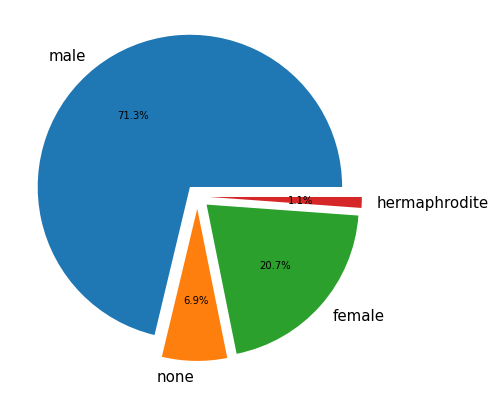

In [94]:
gender_sum = []
gender_name = []

for gender in characters['gender'].unique():
  # Append the total number of row that are of the current gender
  gender_sum.append(len(characters.loc[characters['gender'].str.contains(('^'+gender), na=True, regex=True), 'gender']))
  # Append gender's name
  gender_name.append(gender)

# Display pie plot
plt.rcParams["figure.figsize"] = (10,7)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

plt.pie(gender_sum, labels=gender_name, autopct='%1.1f%%', explode= (0.08, 0.08, 0.08, 0.08))
plt.show()

###Height distribution
Lets see how the Character's height is distributed. We will not display hermaphrodites because there is not enough data to properly see their height distribution.

[]

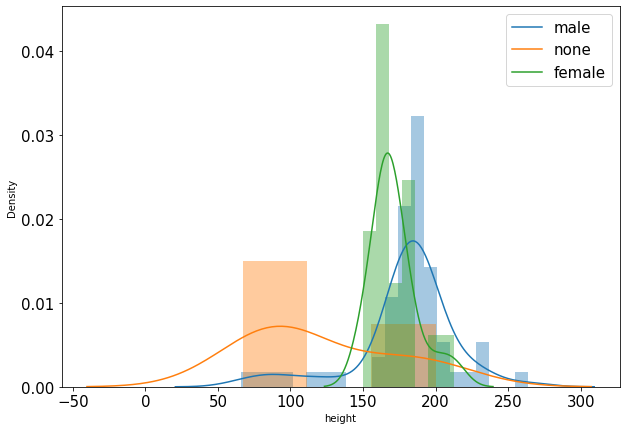

In [95]:
genders = []

for gender in characters['gender'].unique():
  # Check if gender is hermaphrodite - not enough data to properly display
  if gender != "hermaphrodite":
    sns.distplot(characters.loc[characters['gender'].str.contains("^"+gender, na=False, regex=True), "height"], hist=True)
    genders.append(gender)

plt.legend(labels=genders, prop={"size":15})
plt.plot()